# Aula 15 e 16 - SVR Linear

In [10]:
from sklearn import datasets
data = datasets.load_boston()

In [11]:
import numpy as np
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=['MEDV'])

In [12]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [14]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [15]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

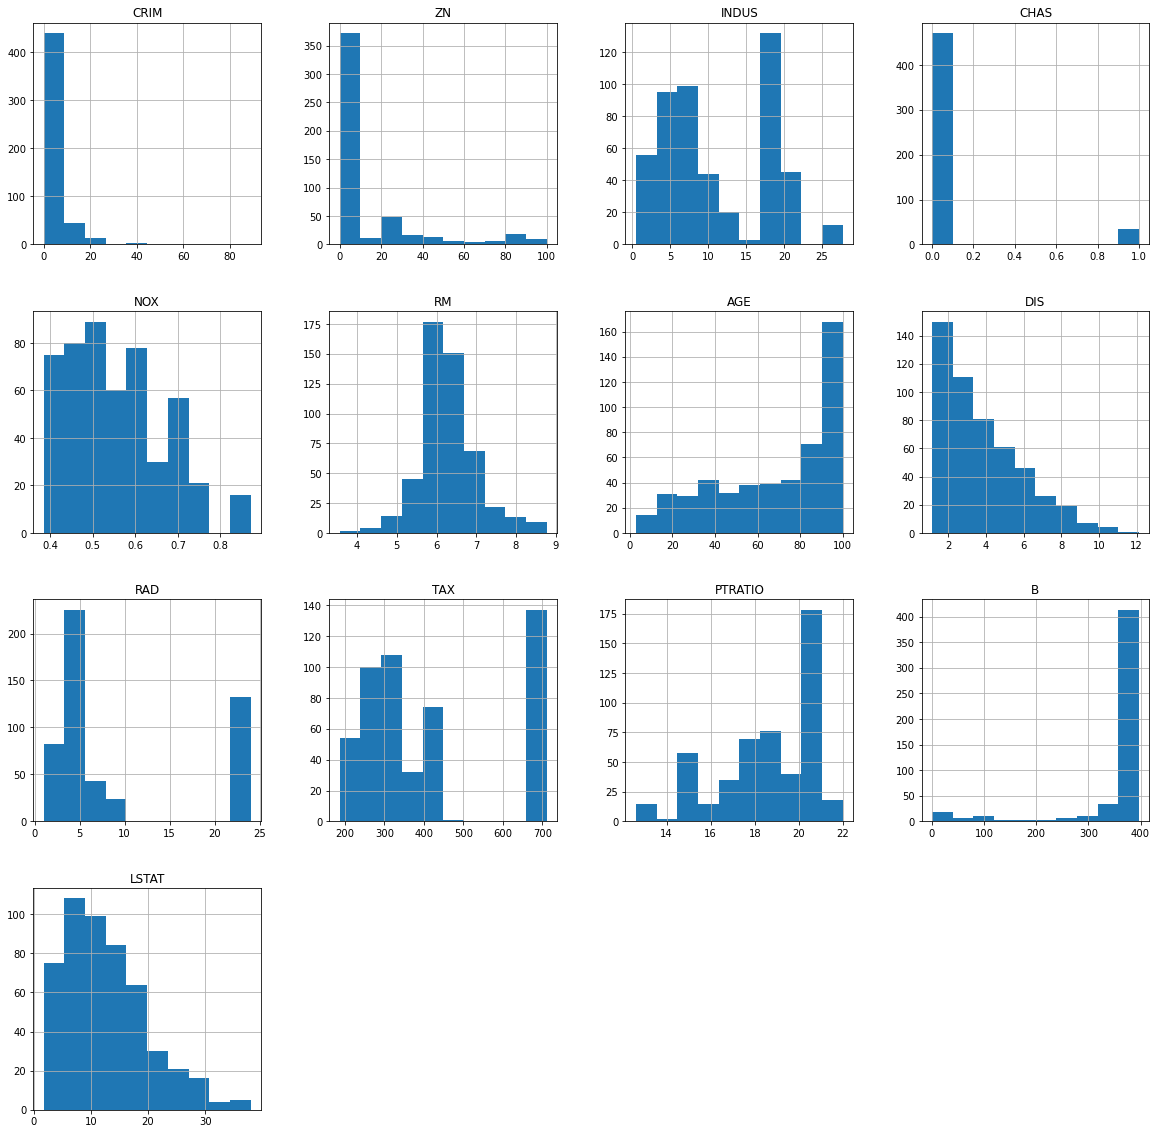

In [16]:
df.hist(figsize=(20,20))

In [17]:
X = df
y = target['MEDV']

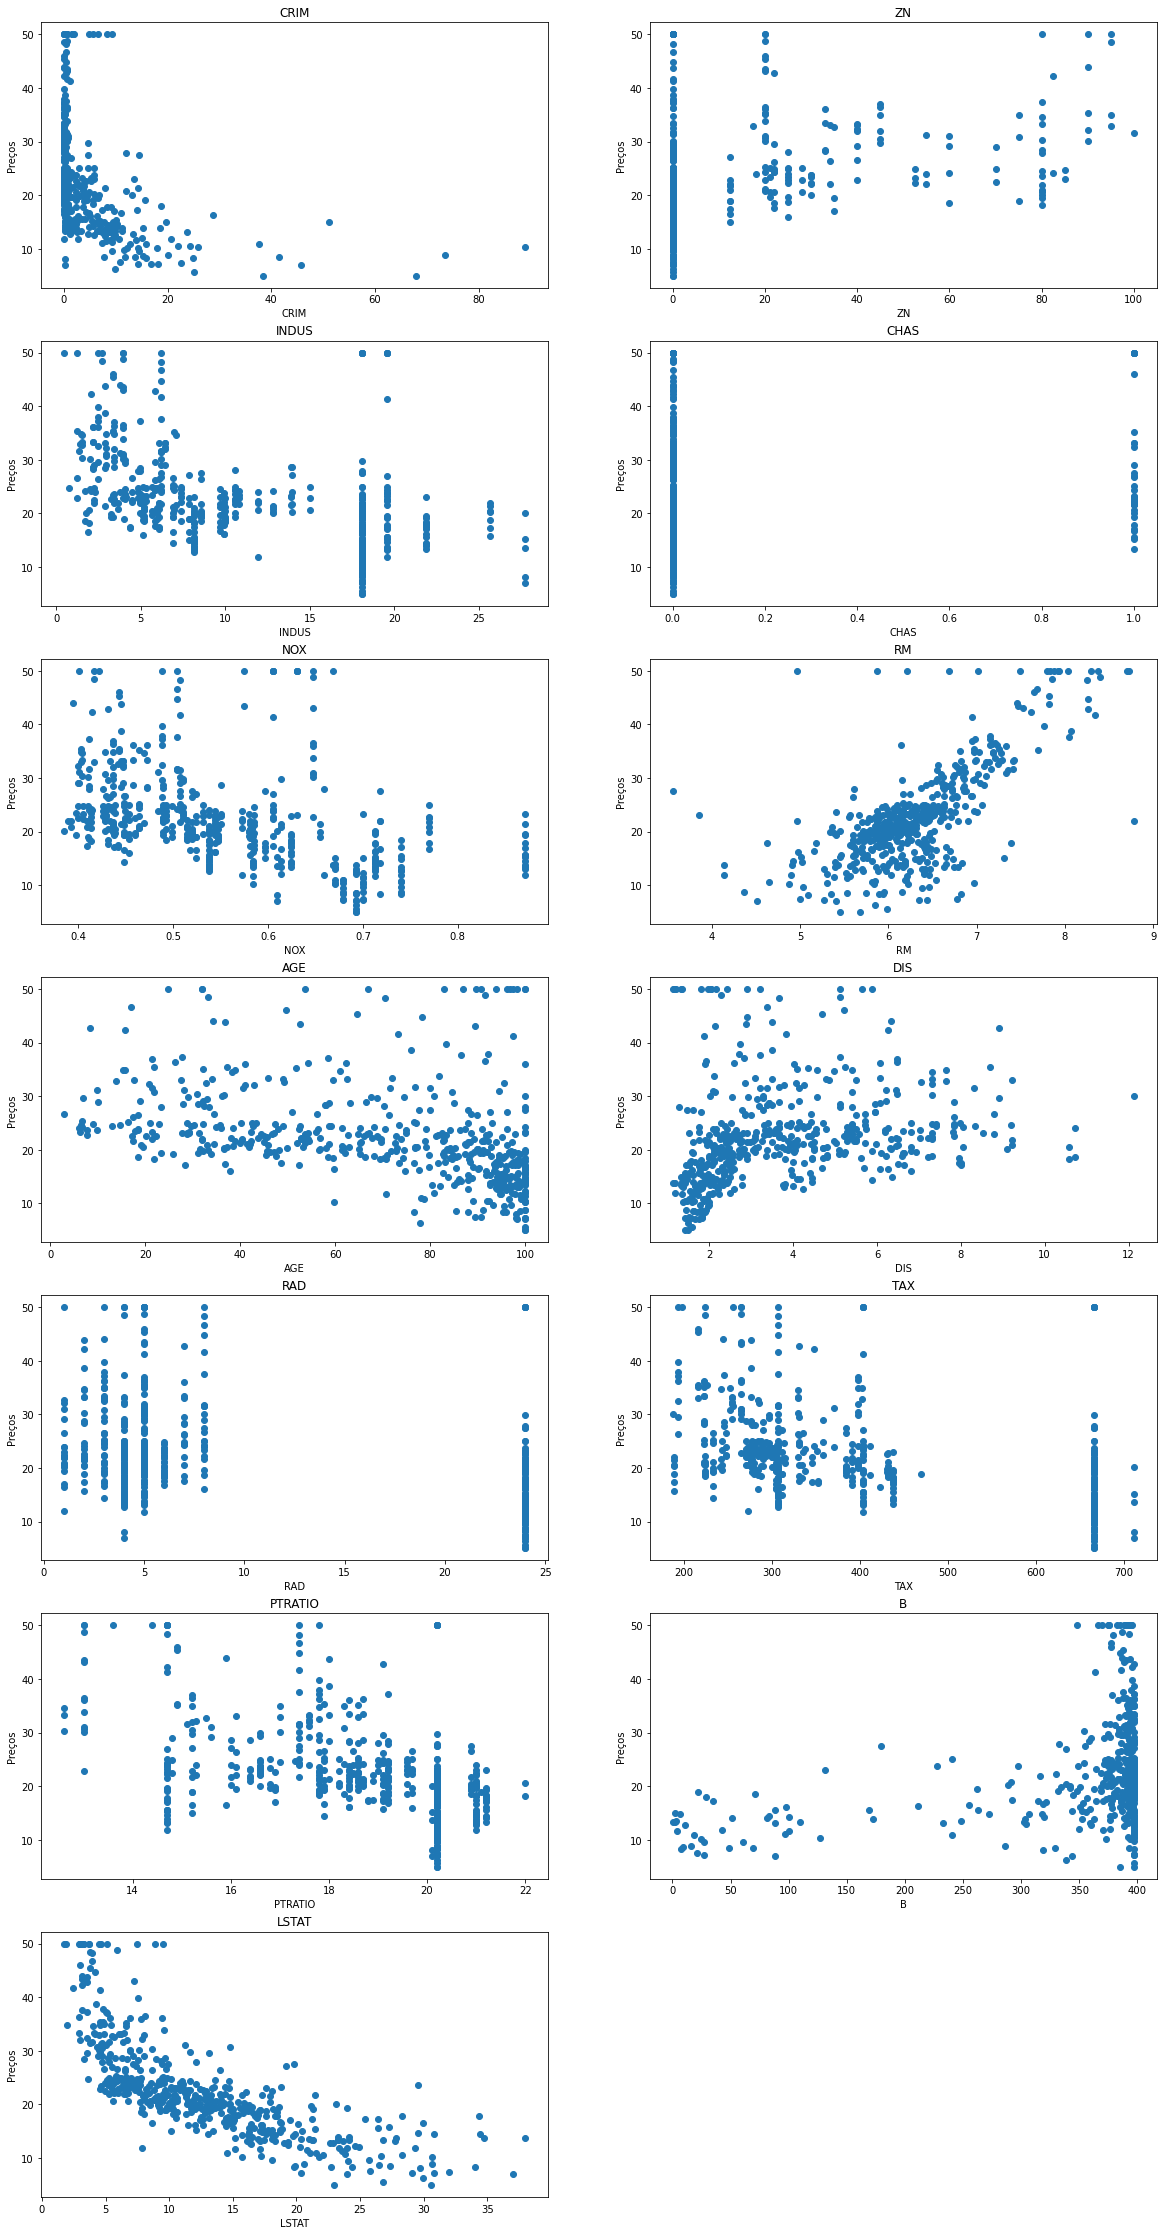

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,40))

for i, col in enumerate(X.columns):
    plt.subplot(7, 2, i+1)
    x = X[col]
    y = y
    plt.plot(x, y, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Preços')

## Linear Regression

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x = X['RM']

x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()

In [24]:
lm.fit(x_train, y_train)

LinearRegression()

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt


In [26]:
y_predict = lm.predict(x_test)

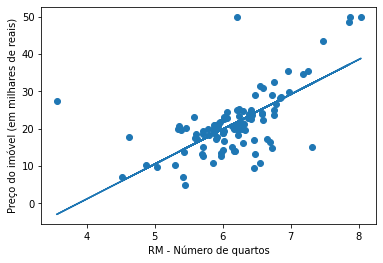

In [27]:
#Gráfico da regressão linear simples
plt.figure()
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predict)
plt.xlabel('RM - Número de quartos')
plt.ylabel('Preço do imóvel (em milhares de reais)')
plt.show()

In [28]:
mae = mean_absolute_error(y_test, y_predict)
print('MAE = ', mae)

MAE =  4.478335832064149


## SVR Linear

In [29]:
from sklearn.svm import LinearSVR

In [30]:
eps = 5
C = 0.01
svr = LinearSVR(epsilon = eps, C = C, fit_intercept = True)

In [31]:
svr.fit(x_train, y_train)

C:\Users\yumil\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LinearSVR(C=0.01, epsilon=5)

In [32]:
y_predict = svr.predict(x_test)

In [33]:
mae = mean_absolute_error(y_test, y_predict)
print('MAE = U$', mae*1000)

MAE = U$ 5170.130982108155


In [34]:
def svr_results (x_test, y_test, modelo_svr_treinado):
    y_predict = modelo_svr_treinado(x_test)
    mae = mean_absolute_error(y_test, y_predict)
    print ('MAE = U$', mae*1000)
    print ('Porcentagem de pontos dentro da margem de erro', porc_dentro_margem_erro)